# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
both_df = pd.merge(mouse_metadata, study_results)
both_df

# Display the data table for preview


In [ ]:
# Checking the number of mice.
mice_num = both_df["Mouse ID"].nunique()
mice_num

In [ ]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = both_df[both_df.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate_mouse_ids = duplicate_rows["Mouse ID"].unique()
print("Duplicate Mouse IDs:", duplicate_mouse_ids)


In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 


In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = both_df[both_df["Mouse ID"] != 'g989']
cleaned_df

In [ ]:
# Checking the number of mice in the clean DataFrame.
new_count = cleaned_df["Mouse ID"].unique()
new_mice_count = len(new_count)
new_mice_count

## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean_mice = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean().map('{:.2f}'.format)
median_mice = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median().map('{:.2f}'.format)
variable_mice = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var().map('{:.2f}'.format)
stddev_mice = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std().map('{:.2f}'.format)
sem_mice = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem().map('{:.2f}'.format)
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary = pd.DataFrame({"Mean": mean_mice, "Median": median_mice, "Variance": variable_mice, "Standard Deviation": stddev_mice, "SEM": sem_mice})
summary

In [ ]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = cleaned_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

## Bar and Pie Charts

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_reg = cleaned_df.groupby("Drug Regimen")
drug_count = pd.DataFrame(drug_reg["Drug Regimen"].count())
drug_bar = drug_count.plot(kind='bar', color="red")
plt.title("Total # of Measurements for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Measurements")
plt.tight_layout()
plt.show()

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(drug_count))
tick_loc = [value for value in x_axis]

plt.figure(figsize=(7,4))
plt.bar(x_axis, drug_count["Drug Regimen"], color='red', alpha=1, align="center", width=0.5)
plt.xticks(tick_loc, list(drug_count.index), rotation='vertical')
plt.xlim(-0.5, len(x_axis)-0.5)
plt.ylim(0, max(drug_count["Drug Regimen"])+10)
plt.title("Total # of Measurements for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Measurements")

drug_reg = ["Drug Regimen"]
plt.legend(drug_reg, loc="best")
plt.tight_layout()
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = cleaned_df['Sex'].value_counts()

# Plot the pie chart with Plot
plt.figure(figsize=(7, 4))
gender_count.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])

plt.title('Distribution of Female versus Male Mice')
plt.ylabel('')
plt.axis('equal')
plt.legend(labels=gender_count.index, loc='best')
plt.show()


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = cleaned_df['Sex'].value_counts()

# Plot the pie chart using PLT
plt.figure(figsize=(7, 4))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])

plt.title('Distribution of Female versus Male Mice')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

capo_df = both_df.loc[both_df["Drug Regimen"] == "Capomulin",:]
rami_df = both_df.loc[both_df["Drug Regimen"] == "Ramicane", :]
infu_df = both_df.loc[both_df["Drug Regimen"] == "Infubinol", :]
ceft_df = both_df.loc[both_df["Drug Regimen"] == "Ceftamin", :]
# cap_df.head()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
capo_last = capo_df.groupby('Mouse ID').max()['Timepoint']
capo_last_vol = pd.DataFrame(capo_last)
capo_merge = pd.merge(capo_last_vol, both_df, on=("Mouse ID","Timepoint"),how="left")
capo_merge.head(5)

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
cap_tumors = capo_merge["Tumor Volume (mm3)"]

quart = cap_tumors.quantile([.25,.5,.75])
lowerq = quart[0.25]
upperq = quart[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quart[0.5]} ")

# Determine outliers using upper and lower bounds
above_out = lowerq - (1.5*iqr)
lower_out = upperq + (1.5*iqr)

print(f"Anything below {lower_out} could be outliers.")
print(f"Anything above {above_out} could be outliers.")


In [ ]:
# Ramicane
rami_last = rami_df.groupby('Mouse ID').max()['Timepoint']
rami_vol = pd.DataFrame(rami_last)
rami_merge = pd.merge(rami_vol, both_df, on=("Mouse ID","Timepoint"),how="left")
# rami_merge.head()

ram_tumors =rami_merge["Tumor Volume (mm3)"]

quart = ram_tumors.quantile([.25,.5,.75])
lowerq = quart[0.25]
upperq = quart[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quart[0.5]} ")

# Determine outliers using upper and lower bounds
above_out = lowerq - (1.5*iqr)
lower_out = upperq + (1.5*iqr)

print(f"Anything below {lower_out} could be outliers.")
print(f"Anything above {above_out} could be outliers.")


In [ ]:

#Infubinol
Infu_last = infu_df.groupby('Mouse ID').max()['Timepoint']
Infu_vol = pd.DataFrame(Infu_last)
Infu_merge = pd.merge(Infu_vol, both_df, on=("Mouse ID","Timepoint"),how="left")
# Infubinol_merge.head()

infu_tumors = Infu_merge["Tumor Volume (mm3)"]

quartiles =infu_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

lower_out = lowerq - (1.5*iqr)
above_out = upperq + (1.5*iqr)


print(f"Anything below {lower_out} could be outliers.")
print(f"Anything above {above_out} could be outliers.")


In [ ]:
# Ceftamin
ceft_last = ceft_df.groupby('Mouse ID').max()['Timepoint']
ceft_vol = pd.DataFrame(ceft_last)
ceft_merge = pd.merge(ceft_vol, both_df, on=("Mouse ID","Timepoint"),how="left")
ceft_merge.head()

ceft_tumors = ceft_merge["Tumor Volume (mm3)"]

quartiles = ceft_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_out = lowerq - (1.5*iqr)
above_out = upperq + (1.5*iqr)

print(f"Anything below {lower_out} could be outliers.")
print(f"Anything above {above_out} could be outliers.")


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

b_plot = [cap_tumors, ram_tumors, infu_tumors, ceft_tumors]
reg_plot = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume at Selected Mouse',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(b_plot, labels=reg_plot, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

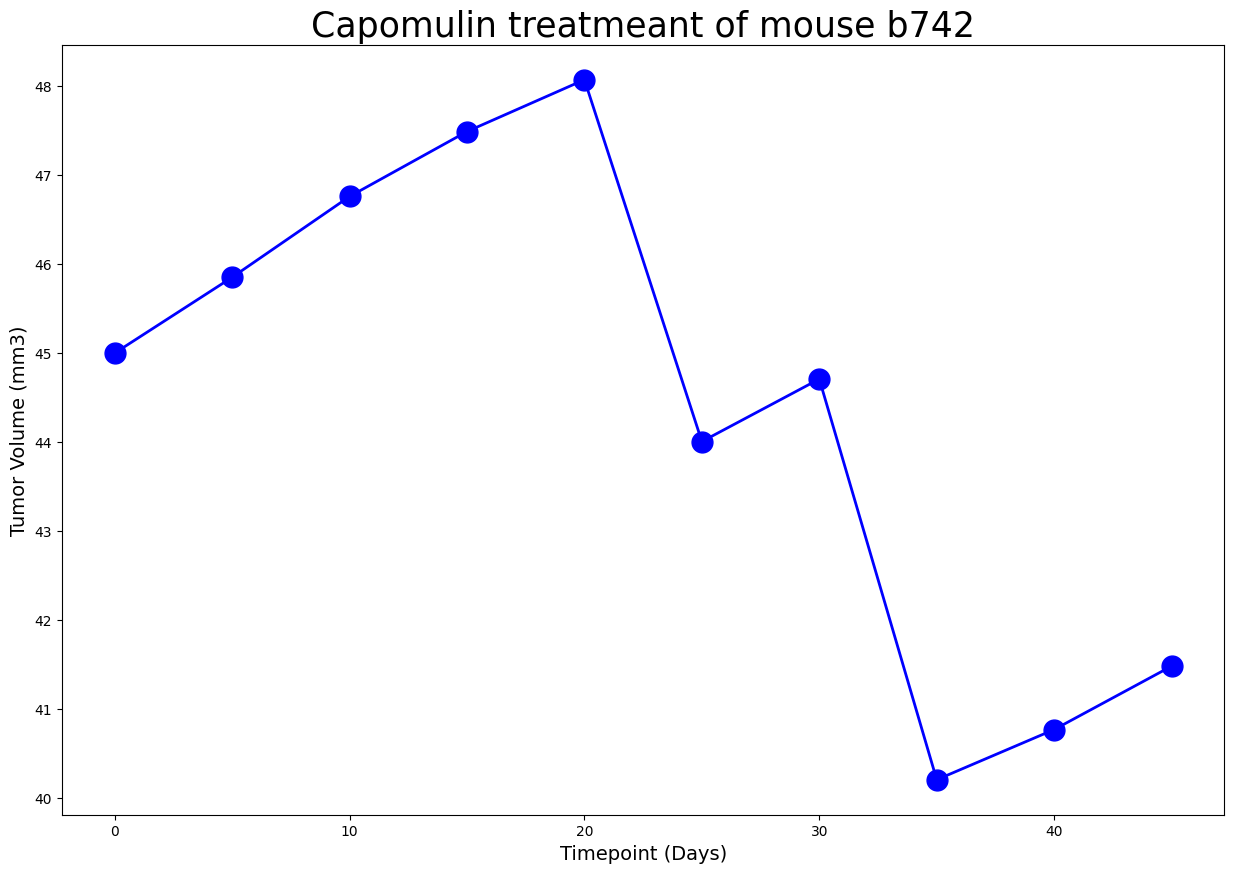

In [170]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
pline = capo_df.loc[capo_df["Mouse ID"] == "l509",:]
pline.head()

x_axis = pline["Timepoint"]
y_axis = pline["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin treatmeant of mouse b742',fontsize =25)
plt.plot(x_axis, y_axis,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)

plt.show()

In [180]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# print(capo_df.dtypes)


capo_df = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']

# Group by 'Mouse ID' and calculate the mean tumor volume
avg_capo_volume = capo_df.groupby('Mouse ID')['Tumor Volume (mm3)', 'Weight (g)'].mean()

# Generate the scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(avg_capo_volume['Weight (g)'], avg_capo_volume['Tumor Volume (mm3)'], color='blue', alpha=0.75)

# Add labels and title
plt.title('Mouse Weight Versus Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)

# Show the plot
plt.show()

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

## Correlation and Regression

In [182]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
avg_capo_volume = capo_df.groupby(['Mouse ID']).mean()
corr=round(st.pearsonr(avg_capo_volume['Weight (g)'],avg_capo_volume['Tumor Volume (mm3)'])[0],2)

x_values = avg_capo_volume['Weight (g)']
y_values = avg_capo_volume['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress = x_values * slope + intercept

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,s=175, color="blue")
plt.plot(x_values,regress,"r-")
plt.title('Regression Plot of Mouse Weight Versus Average Tumor Volume',fontsize =20)
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =14)

print(f"The r-squared is: {rvalue**2}")

plt.savefig("../Images/linear_regression.png", bbox_inches = "tight")
plt.show()

TypeError: agg function failed [how->mean,dtype->object]